# Imports

In [1]:
try:
  import iminuit
  from iminuit import Minuit
  from iminuit.cost import LeastSquares
except:
  Exception('Error Initialising Iminuit')

In [2]:
import os
from IPython.display import Latex
import numpy as np
import matplotlib.pyplot as plt

from funcs import *
from stats import *

# funcs

In [3]:
def V_RC(t,V_o,R,C,T, offset):
    return V_o*( 1 - 2*(np.exp(-(t+offset)/(R*C))))
    return V_o*( 1 - 2*(np.exp(-(t+offset)/(R*C)) / (1+np.exp( -T/(R*C) ) ) ) )

def V_RC_2(t,V_o,R,C,T, offset):
    return -V_o*( 1 - 2*(np.exp(- ((t+offset)-(T/2)) /(R*C)) / (1+np.exp( -T/(R*C) ) ) ) )

def exp1(t,V_o,R,C,offset):
    return V_o*np.exp(-t/(R*C)) + offset

# RC

In [4]:
C_val = 49e-9

## R = 700 $\Omega$

277


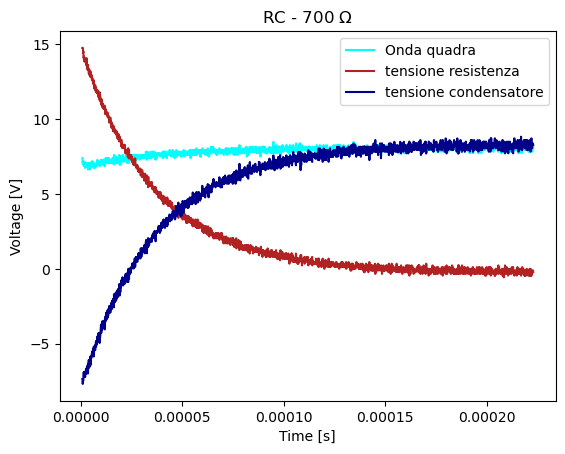

In [31]:
RC_700_quadra, RC_700_data, RC_700_math  = get_data('data/RC_700/')
RC_700_math = RC_700_data[0], (RC_700_quadra[1] - RC_700_data[1])

cut = True

i = 0
if cut:
    v = RC_700_data[1][0]
    while(v < np.max(RC_700_data[1])):
        v = RC_700_data[1][i]
        i+=1
    print(i)

plt.title('RC - 700 $\Omega$')
plt.plot(RC_700_quadra[0][i:],RC_700_quadra[1][i:], c='cyan')
plt.plot(RC_700_data[0][i:],  RC_700_data[1][i:],   c='firebrick')
plt.plot(RC_700_math[0][i:],  RC_700_math[1][i:],   c='darkblue')
# plt.xscale('log')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.legend(['Onda quadra','tensione resistenza', 'tensione condensatore'])
plt.show()

In [32]:
c = LeastSquares(RC_700_math[0][277:],RC_700_math[1][277:], .2, V_RC)
m = Minuit(c, R=700, V_o=8.3314, C=C_val,T=0.025, offset=0)
m.fixed['T','C'] = True
m.limits['C','R'] = (0,np.inf)
m.migrad()
m.hesse()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2251 (χ²/ndof = 1.0)       │              Nfcn = 113              │
│ EDM = 4.21e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name   │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ V_o    │   8.308   │   0.007   │            │            │         │         │       │
│ 1 │ R      │   755.6   │    1.9    │            │            │    0    │         │       │
│ 2 │ C      │  49.0e-9  │  0.5e-9   │            │            │    0    │         │  yes  │
│ 3 │ T      │ 25.00e-3  │  0.25e-3  │            │            │         │         │  yes  │
│ 4 │ offset │  0.78e-6  │  0.06e-6  │            │            │         │         │       │
└───┴────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────────┬──────────────────────────────────────────────────────────────────┐
│        │          V_o            R            C            T       offset │
├────────┼──────────────────────────────────────────────────────────────────┤
│    V_o │     5.08e-05      9.38e-3            0            0  239.755e-12 │
│      R │      9.38e-3         3.68            0            0 96.041809e-9 │
│      C │            0            0            0            0        0e-15 │
│      T │            0            0            0            0        0e-15 │
│ offset │  239.755e-12 96.041809e-9        0e-15        0e-15     3.67e-15 │
└────────┴──────────────────────────────────────────────────────────────────┘

In [33]:
print('pvalue = ',chi_test(m.fval, m.ndof, 4000))
plt.close()

pvalue =  0.31117440658952444


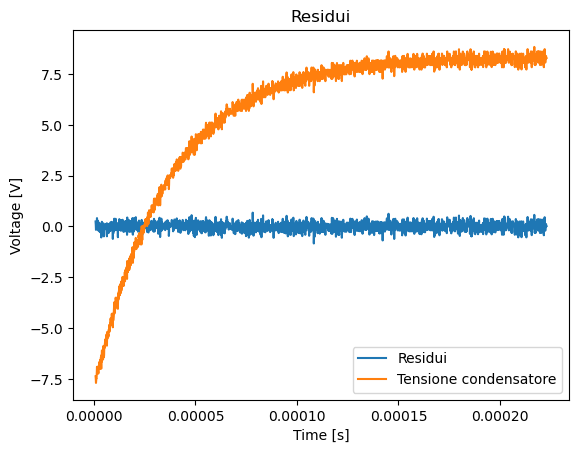

In [34]:
N = 277
resti = [i-j for i,j in zip(RC_700_math[1][N:],V_RC(RC_700_math[0][N:],m.values['V_o'],m.values['R'],m.values['C'],m.values['T'],m.values['offset']))]
plt.title('Residui')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.plot(RC_700_math[0][N:],resti)
plt.plot(RC_700_math[0][N:],RC_700_math[1][N:])
plt.legend(['Residui','Tensione condensatore'])

In [35]:
Latex(f'$R_g$ = {m.values["R"]-700} $\Omega$')

<IPython.core.display.Latex object>

## R = 1000 $\Omega$

278


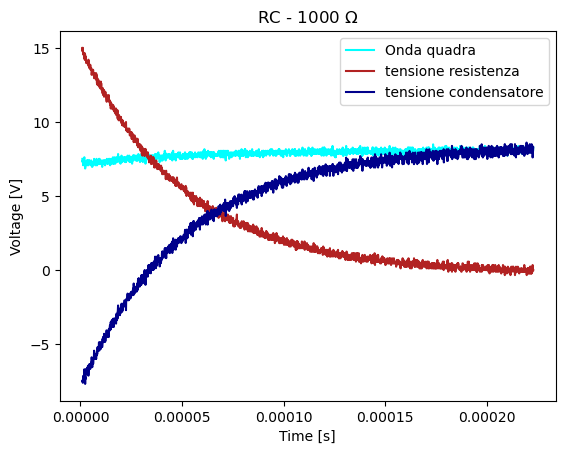

In [36]:
RC_1000_quadra, RC_1000_data, RC_1000_math  = get_data('data/RC_1000/')
RC_1000_math = RC_1000_data[0], (RC_1000_quadra[1] - RC_1000_data[1])

cut = True

i = 0
if cut:
    v = RC_1000_data[1][0]
    while(v < np.max(RC_1000_data[1])):
        v = RC_1000_data[1][i]
        i+=1
    print(i)

plt.title('RC - 1000 $\Omega$')
plt.plot(RC_1000_quadra[0][i:],RC_1000_quadra[1][i:], c='cyan')
plt.plot(RC_1000_data[0][i:],  RC_1000_data[1][i:],   c='firebrick')
plt.plot(RC_1000_math[0][i:],  RC_1000_math[1][i:],   c='darkblue')
# plt.xscale('log')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.legend(['Onda quadra','tensione resistenza', 'tensione condensatore'])
plt.show()

In [37]:
c = LeastSquares(RC_1000_math[0][278:],RC_1000_math[1][278:], .2, V_RC)
m = Minuit(c, R=1000, V_o=8.3314, C=C_val,T=0.025, offset=0)
m.fixed['T','C'] = True
m.limits['C','R'] = (0,np.inf)
m.migrad()
m.hesse()
Latex(f'$R_g$ = {m.values["R"]-1000} $\Omega$')

<IPython.core.display.Latex object>

## R = 1400 $\Omega$

In [50]:
RC_1400_quadra, RC_1400_data, RC_1400_math  = get_data('data/RC_1400/')
RC_1400_math = RC_1400_data[0], (RC_1400_quadra[1] - RC_1400_data[1])

cut = True

i = 0
if cut:
    v = RC_1400_data[1][0]
    while(v < np.max(RC_1400_data[1])):
        v = RC_1400_data[1][i]
        i+=1
    print(i)

plt.title('RC - 1400 $\Omega$')
plt.plot(RC_1400_quadra[0][i:],RC_1400_quadra[1][i:], c='cyan')
plt.plot(RC_1400_data[0][i:],  RC_1400_data[1][i:],   c='firebrick')
plt.plot(RC_1400_math[0][i:],  RC_1400_math[1][i:],   c='darkblue')
# plt.xscale('log')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.legend(['Onda quadra','tensione resistenza', 'tensione condensatore'])
plt.close()

108


In [53]:
c = LeastSquares(RC_1400_math[0][108:],RC_1400_math[1][108:], .2, V_RC)
m = Minuit(c, R=1400, V_o=8.3314, C=C_val,T=0.025, offset=0)
m.fixed['T','C'] = True
m.limits['C','R'] = (0,np.inf)
m.migrad()
m.hesse()
Latex(f'$R_g$ = {m.values["R"]-1400} $\Omega$')

<IPython.core.display.Latex object>

## R = 2000 $\Omega$

In [40]:
RC_2000_quadra, RC_2000_data, RC_2000_math  = get_data('data/RC_2000/')
RC_2000_math = RC_2000_data[0], (RC_2000_quadra[1] - RC_2000_data[1])

cut = True

i = 0
if cut:
    v = RC_2000_data[1][0]
    while(v < np.max(RC_2000_data[1])):
        v = RC_2000_data[1][i]
        i+=1
    print(i)

plt.title('RC - 2000 $\Omega$')
plt.plot(RC_2000_quadra[0][i:],RC_2000_quadra[1][i:], c='cyan')
plt.plot(RC_2000_data[0][i:],  RC_2000_data[1][i:],   c='firebrick')
plt.plot(RC_2000_math[0][i:],  RC_2000_math[1][i:],   c='darkblue')
# plt.xscale('log')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.legend(['Onda quadra','tensione resistenza', 'tensione condensatore'])
plt.close()

110


In [41]:
c = LeastSquares(RC_2000_math[0][108:],RC_2000_math[1][108:], .2, V_RC)
m = Minuit(c, R=2000, V_o=8.3314, C=C_val,T=0.025, offset=0)
m.fixed['T','C'] = True
m.limits['C','R'] = (0,np.inf)
m.migrad()
m.hesse()
Latex(f'$R_g$ = {m.values["R"]-2000} $\Omega$')

<IPython.core.display.Latex object>

## R = 2400 $\Omega$

In [42]:
RC_2400_quadra, RC_2400_data, RC_2400_math  = get_data('data/RC_2400/')
RC_2400_math = RC_2400_data[0], (RC_2400_quadra[1] - RC_2400_data[1])

cut = True

i = 0
if cut:
    v = RC_2400_data[1][0]
    while(v < np.max(RC_2400_data[1])):
        v = RC_2400_data[1][i]
        i+=1
    print(i)

plt.title('RC - 2400 $\Omega$')
plt.plot(RC_2400_quadra[0][i:],RC_2400_quadra[1][i:], c='cyan')
plt.plot(RC_2400_data[0][i:],  RC_2400_data[1][i:],   c='firebrick')
plt.plot(RC_2400_math[0][i:],  RC_2400_math[1][i:],   c='darkblue')
# plt.xscale('log')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.legend(['Onda quadra','tensione resistenza', 'tensione condensatore'])
plt.close()

117


In [43]:
c = LeastSquares(RC_2400_math[0][108:],RC_2400_math[1][108:], .2, V_RC)
m = Minuit(c, R=2400, V_o=8.3314, C=C_val,T=0.025, offset=0)
m.fixed['T','C'] = True
m.limits['C','R'] = (0,np.inf)
m.migrad()
m.hesse()
Latex(f'$R_g$ = {m.values["R"]-2400} $\Omega$')

<IPython.core.display.Latex object>

## R = 3000 $\Omega$

In [44]:
RC_3000_quadra, RC_3000_data, RC_3000_math  = get_data('data/RC_3000/')
RC_3000_math = RC_3000_data[0], (RC_3000_quadra[1] - RC_3000_data[1])

cut = True

i = 0
if cut:
    v = RC_3000_data[1][0]
    while(v < np.max(RC_3000_data[1])):
        v = RC_3000_data[1][i]
        i+=1
    print(i)

plt.title('RC - 3000 $\Omega$')
plt.plot(RC_3000_quadra[0][i:],RC_3000_quadra[1][i:], c='cyan')
plt.plot(RC_3000_data[0][i:],  RC_3000_data[1][i:],   c='firebrick')
plt.plot(RC_3000_math[0][i:],  RC_3000_math[1][i:],   c='darkblue')
# plt.xscale('log')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.legend(['Onda quadra','tensione resistenza', 'tensione condensatore'])
plt.close()

117


In [45]:
c = LeastSquares(RC_3000_math[0][108:],RC_3000_math[1][108:], .2, V_RC)
m = Minuit(c, R=3000, V_o=8.3314, C=C_val,T=0.025, offset=0)
m.fixed['T','C'] = True
m.limits['C','R'] = (0,np.inf)
m.migrad()
m.hesse()
Latex(f'$R_g$ = {m.values["R"]-3000} $\Omega$')

<IPython.core.display.Latex object>

## R = 4000 $\Omega$

In [46]:
RC_4000_quadra, RC_4000_data, RC_4000_math  = get_data('data/RC_4000/')
RC_4000_math = RC_4000_data[0], (RC_4000_quadra[1] - RC_4000_data[1])

cut = True

i = 0
if cut:
    v = RC_4000_data[1][0]
    while(v < np.max(RC_4000_data[1])):
        v = RC_4000_data[1][i]
        i+=1
    print(i)

plt.title('RC - 4000 $\Omega$')
plt.plot(RC_4000_quadra[0][i:],RC_4000_quadra[1][i:], c='cyan')
plt.plot(RC_4000_data[0][i:],  RC_4000_data[1][i:],   c='firebrick')
plt.plot(RC_4000_math[0][i:],  RC_4000_math[1][i:],   c='darkblue')
# plt.xscale('log')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.legend(['Onda quadra','tensione resistenza', 'tensione condensatore'])
plt.close()

117


In [47]:
c = LeastSquares(RC_4000_math[0][108:],RC_4000_math[1][108:], .2, V_RC)
m = Minuit(c, R=4000, V_o=8.3314, C=C_val,T=0.025, offset=0)
m.fixed['T','C'] = True
m.limits['C','R'] = (0,np.inf)
m.migrad()
m.hesse()
Latex(f'$R_g$ = {m.values["R"]-4000} $\Omega$')

<IPython.core.display.Latex object>

## R = 6000 $\Omega$

In [48]:
RC_6000_quadra, RC_6000_data, RC_6000_math  = get_data('data/RC_6000/')
RC_6000_math = RC_6000_data[0], (RC_6000_quadra[1] - RC_6000_data[1])

cut = True

i = 0
if cut:
    v = RC_6000_data[1][0]
    while(v < np.max(RC_6000_data[1])):
        v = RC_6000_data[1][i]
        i+=1
    print(i)

plt.title('RC - 6000 $\Omega$')
plt.plot(RC_6000_quadra[0][i:],RC_6000_quadra[1][i:], c='cyan')
plt.plot(RC_6000_data[0][i:],  RC_6000_data[1][i:],   c='firebrick')
plt.plot(RC_6000_math[0][i:],  RC_6000_math[1][i:],   c='darkblue')
# plt.xscale('log')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.legend(['Onda quadra','tensione resistenza', 'tensione condensatore'])
plt.close()

103


In [49]:
c = LeastSquares(RC_6000_math[0][108:],RC_6000_math[1][108:], .2, V_RC)
m = Minuit(c, R=6000, V_o=8.3314, C=C_val,T=0.025, offset=0)
m.fixed['T','C'] = True
m.limits['C','R'] = (0,np.inf)
m.migrad()
m.hesse()
Latex(f'$R_g$ = {m.values["R"]-6000} $\Omega$')

<IPython.core.display.Latex object>